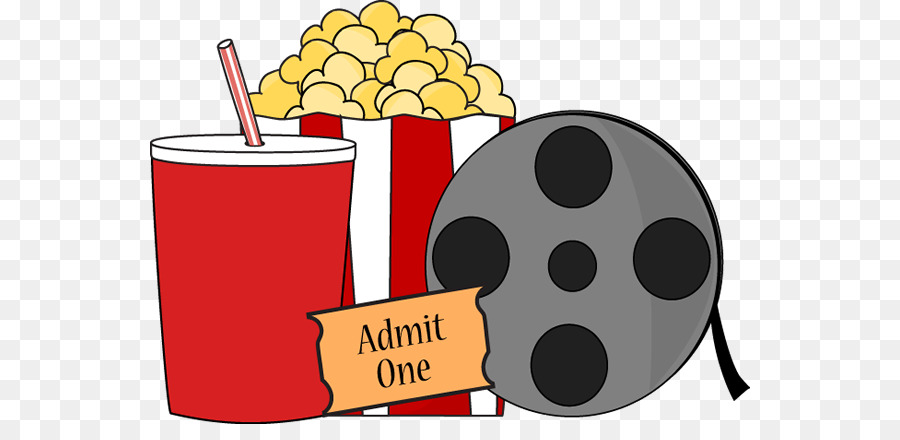

# Unveilling Trends for Microsoft's Cinematic Odyssey with Data Analytics

**Authors:** Andrinny Soemitro
***

## Overview

Microsoft is venturing into a cinematic odyssey by establishing a new movie studio. The ever-changing landscape of modern cinema has been seen to be a challenging terrain to navigate, and by delving into data analyses of the current box office trends, this project aims to strategically navigate this challenging terrain for Microsoft and offering actionable insights into the current landscape of successful films. Diverse datasets were analyzed to understand genre distribution, profitability, the relationship between budget and revenue, and the impact of film ratings on financial success. Key recommendations for Microsoft include focusing on genres with higher average revenue, optimizing budget allocation for profitable genres, and considering shorter runtimes for films. Limitations, such as data constraints and the subjective nature of genre categorization, are acknowledged. Future steps involve enhancing data sources and quality, implementing predictive analytics for genre trends, and fostering collaboration with film industry experts to gain a more comprehensive understanding of global industry trends.

## Business Problem

The complexity of transitioning from technology to entertainment for a corportation renowned for its technological prowess highlights the necessity for a refined strategy. The primary challenge confronting Microsoft lies in its limited experience within the film industry coupled with the aspiration to launch a flourishing movie studio as they aim to enter this unfamiliar domain. Gaining insights into the current landscape of successful films at the box office is crucial. The approach taken to answer Microsoft pain points encompassed the analysis of a diverse array of given datasets to analyze the genres distribution over the year to gain understanding of what is on trend, along with the profitability across genres and the relationship between budget and profit. In addition, analysis was also performed to see how film rating correlates with both genres and financial success. These points are important for Microsoft to developing strategies that align with market demands.

## Data Understanding

The datasets used in this project were sourced from Internet Movie Database (IMDb), The Movie Database (TMdb) and Rotten Tomatoes which were given in the beginning of the project in the form of datasets in 'ZippedData' folder. Analyses were carried out utilizing four files in the 'ZippedData' corresponding to each facet of the question under consideration. The analyses were conducted focusing on the data files which have related information.


### Genre Data

Analyzing genres is crucial to understand the cinematic landscape. By exploring how different genres are distributed and their trends, patterns can show diverse preferences and dynamics in the film industry. The data represent a comprehensive analysis of joined datasets (title_df and rating_df). Every movie has its own unique id called 'tconst'. This unique identifier was used to merged the 2 datasets and was stored into new dataframe called genres_df.

In [2]:
title_df = pd.read_csv('./zippedData/imdb.title.basics.csv.gz')
ratings_df = pd.read_csv('./zippedData/imdb.title.ratings.csv.gz')

In [3]:
title_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama


In [4]:
ratings_df.head(3)

,tconst,averagerating,numvotes
0,tt10356526,8,31
1,tt10384606,9,559
2,tt1042974,6,20


### Revenue Data

Additionally, another set of datasets (gross_df and budget_df) was joined to calculate the average revenue, aiming to unveil the connection between budget and revenue, along with understanding the average revenue by genre by joining the first joined dataset into the second joined dataset.

In [5]:
gross_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
budget_df = pd.read_csv ('./zippedData/tn.movie_budgets.csv.gz')

In [6]:
gross_df.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010


In [7]:
budget_df.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


## Data Preparation

The analysis involves exploring genre distribution over the years, average ratings categorized by genre, and the relationship between runtime and average rating. After the duplicated and null values were checked and columns header renamed (original title: title, start_year; year amd runtime_minutes: runtime) for readability and easier analysis, the unneccesary variables were dropped (tconst, primary_title and numvotes). Some movies fall into 3 categories. This necessitate the data to be separated into single-category genre for easier and accurate analysis. Average rating and runtime by genre data were first calculated then explored and visualized.

In [8]:
avg_rating_by_genre.head(3)

,genres,title,averagerating
0,Action,10335,6
1,Adult,25,4
2,Adventure,6465,6


In [9]:
avg_rating_by_runtime.head(3)

,genres,runtime,averagerating
0,Action,100,6
1,Adult,86,4
2,Adventure,86,6


An outlier was discovered in the dataset related to the film's release year, notably the year 2115. Upon exploring the dataframe and further research, it was found that a film titled "100 years" is an actual film going to be released in 2115. As it was irrelevant to the analysis, this outlier was excluded from analysis.

In [10]:
genres_split['year'].unique()

array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022, 2023, 2024, 2026, 2025, 2115, 2027], dtype=int64)

The analysis of revenue data involves exploring the relationship between budget and revenue by joining 2 datasets and creating a new column for calculated average revenue for each genre. After the duplicated and null values were checked and columns header renamed for readability and easier analysis, the unneccesary variables were dropped (studio, domestic_gross, foreign_gross, year, gross and numvotes). For efficiency, average revenue were calculated and scatterplot was created to show the relationship between budget and revenue. In addition, average revenue by genre was also calculated and explored.

In [11]:
revenue_final.head(3)

,title,budget,revenue
0,Toy Story 3,200000000,868879522
1,Inception,160000000,675524642
2,Shrek Forever After,165000000,591244673


In [12]:
avg_revenue_by_genre.head(3)

,genres,revenue_per_genre
0,Animation,302170212
1,Sci-Fi,257487918
2,Adventure,250239908


## Data Modeling

### Genre Distribution over the Years

Understanding genre trends is crucial for Microsoft to formulate strategies aligned with market demands in the film industry. From the 28 genres analyzed, the top 5 of films genres produced over the years are shwon to be Documentary, Drama, Comedy, Thriller and Biography.

In [13]:
#Import standard packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

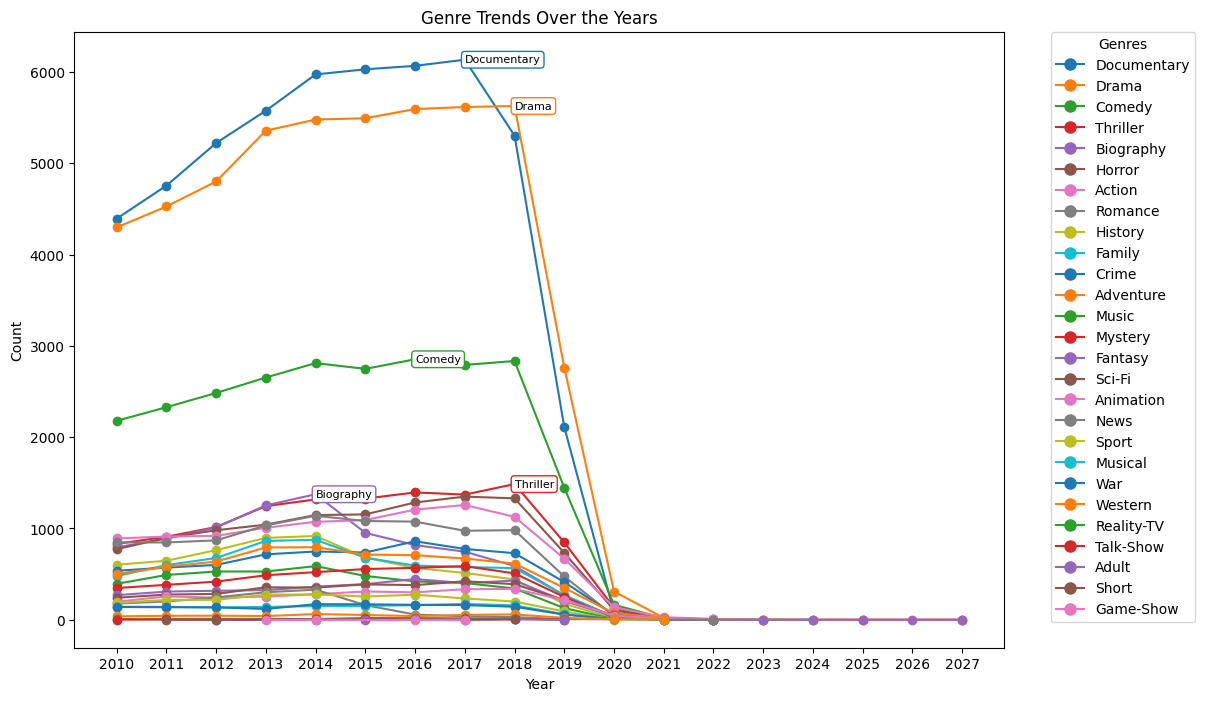

In [14]:
top_genres_dict = {}  #Create a dictionary for top 5 genres
top_genres_list = []  # reate a list to store information for DataFrame

plt.figure(figsize=(12, 8))

#For easy vizualization, labelling will be on the highest point of each of the top 5 genres
#Looping through unique genres
for genre in genres_count['genres'].unique():
    genre_data = genres_count[genres_count['genres'] == genre]
    max_index = genre_data['count'].idxmax()

    #Store top 5 genres in the dictionary created above
    top_genres_dict[genre] = {'year': genre_data['year'].loc[max_index], 'count': genre_data['count'].loc[max_index]}

    #Append information to the list for DataFrame
    top_genres_list.append({'Genre': genre, 'Year': top_genres_dict[genre]['year'], 'Count': top_genres_dict[genre]['count']})

#Sorting genres based on highest points in descending order for easy labelling
top_genres_sorted = sorted(top_genres_dict.items(), key=lambda x: x[1]['count'], reverse=True)

#Convert the list into a DataFrame
top_genres_df = pd.DataFrame(top_genres_list)

#Plot the lines and label only the top 5 genres
from matplotlib.lines import Line2D

legend_handles = [] #Storing legend handles

for genre, data in top_genres_sorted:
    genre_data = genres_count[genres_count['genres'] == genre]
    line, = plt.plot(genre_data['year'], genre_data['count'], label=genre, marker='o')

    #Add text label at the highest point for the top 5 genres with a frame
    if genre in [genre for genre, _ in top_genres_sorted[:5]]:
        plt.text(data['year'], data['count'], genre,
                 fontsize=8, va='center',
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor=line.get_color(), facecolor='white'))

    #Making sure that the line color of the graph matches the legend
    legend_handles.append(Line2D([0], [0], marker='o', color=line.get_color(), label=genre, markersize=8))

#Title, labels, and customized legend based on the legend handles
plt.title('Genre Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(handles=legend_handles, title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

#Making sure that the year stays exactly like on the data (not converted to decimal)
plt.xticks(genres_count['year'].unique())

plt.grid(False)

plt.show(top_genres_list)

#References: Code adopted from Matplotlib website (https://matplotlib.org/stable/users/explain/axes/legend_guide.html), Pandas website (https://pandas.pydata.org/pandas-docs/version/0.13.1/visualization.html)

### Average Rating by Genre

Analyzing the average ratings by genre bar graph reveals audience preferences with short films, documentaries, game-shows, news, and biographies standing out with the highest ratings.

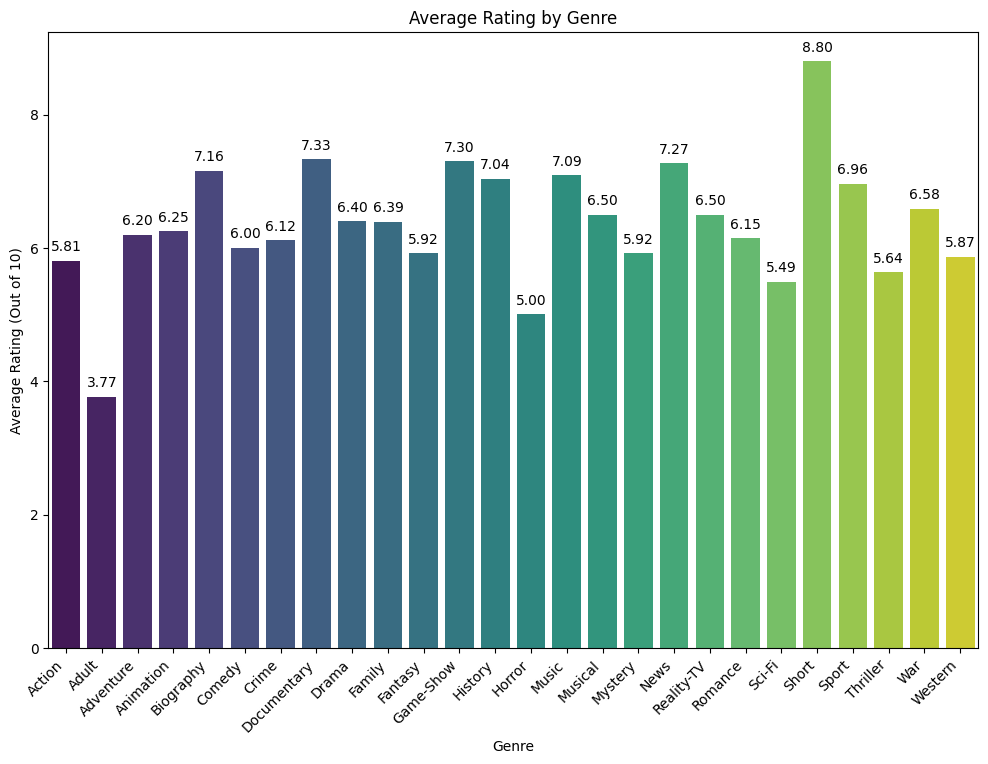

In [15]:
#Plotting the graph
plt.figure(figsize=(12, 8))
ab = sns.barplot(x='genres', y='averagerating', data=avg_rating_by_genre, hue='genres', palette='viridis')

#Rotating labels on x-axis
ab.set_xticks(ab.get_xticks())
ab.set_xticklabels(ab.get_xticklabels(), rotation=45, horizontalalignment='right')

#Average rating on each bars
for p in ab.patches:
    ab.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating (Out of 10)')
plt.show()

### Average Runtime vs Average Rating

Building on from the previous analysis that short films are favored by the audience according to rating, further analysis was performed to investigate the relationship between average runtime and ratings by genre using regression plot. The regression analysis reveals that as the runtime of films increases, there is a corresponding decrease in the ratings assigned by the audience.

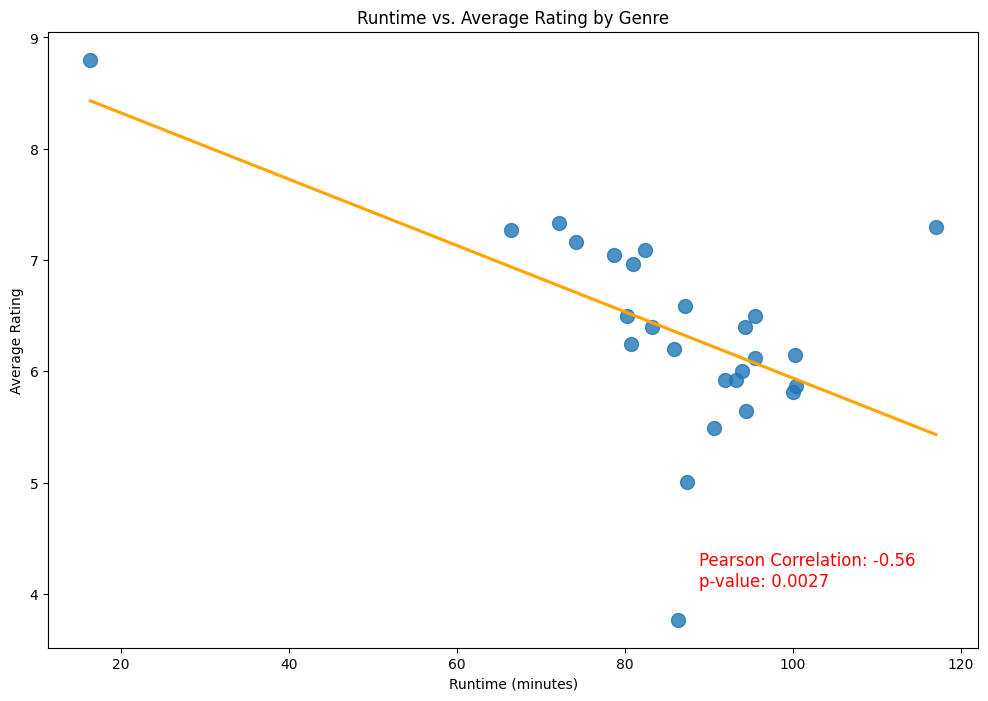

In [16]:
from scipy.stats import pearsonr

#Plotting the graph
plt.figure(figsize=(12, 8))
ar = sns.regplot(x='runtime', y='averagerating', data=avg_rating_by_runtime, scatter_kws={'s': 100}, ci=None, line_kws={'color': 'orange'})

# Calculate correlation and p-value
correlation, p_value = pearsonr(avg_rating_by_runtime['runtime'], avg_rating_by_runtime['averagerating'])

# Annotate the plot with correlation and p-value
annotation_text = f"Pearson Correlation: {correlation:.2f}\np-value: {p_value:.4f}"
ar.annotate(annotation_text, xy=(0.7, 0.1), xycoords='axes fraction', fontsize=12, color='red')

plt.title('Runtime vs. Average Rating by Genre')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.show()

#Code adopted from the SciPy library (https://www.scipy.org/)

### Average Runtime Distribution by Genre

The average runtime in the majority of films of different genres falls between 70 - 110 minutes. Movies that fall under Short film genre have an average runtime below 20 minutes.

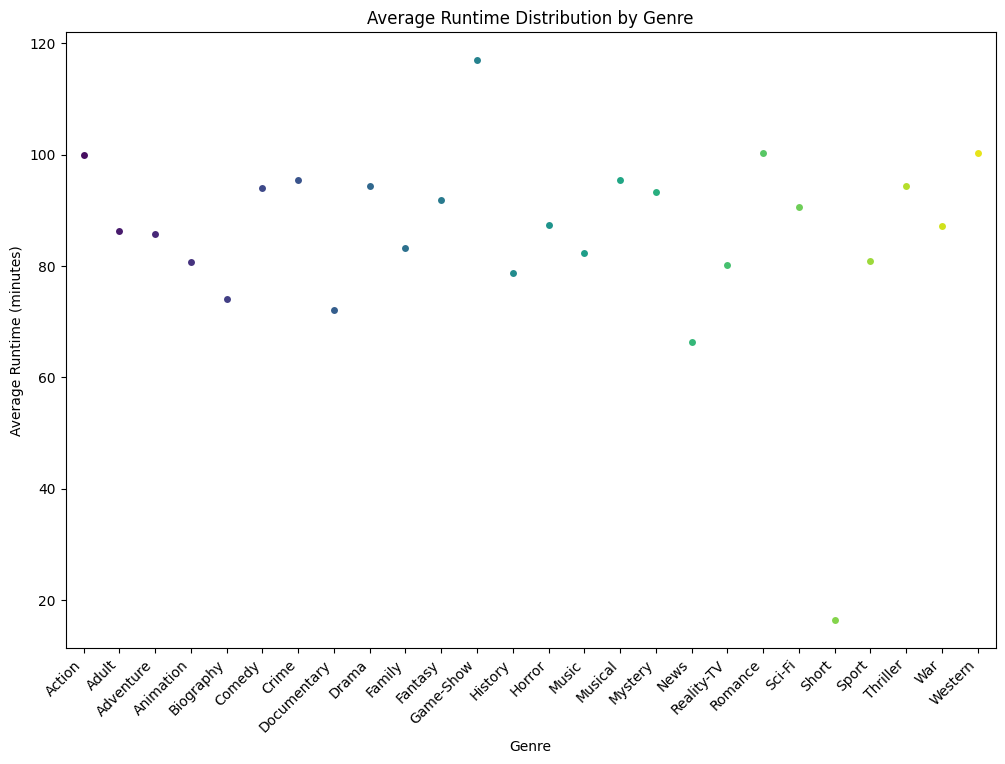

In [17]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='genres', y='runtime', data=avg_rating_by_runtime, hue='genres', palette='viridis')

plt.title('Average Runtime Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Runtime (minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()

### Relationship between Budget and Revenue

The scatterplot analysis demonstrates a positive correlation between the budget and revenue of films. In other words, as the budget increases, there is a corresponding increase in the revenue generated.

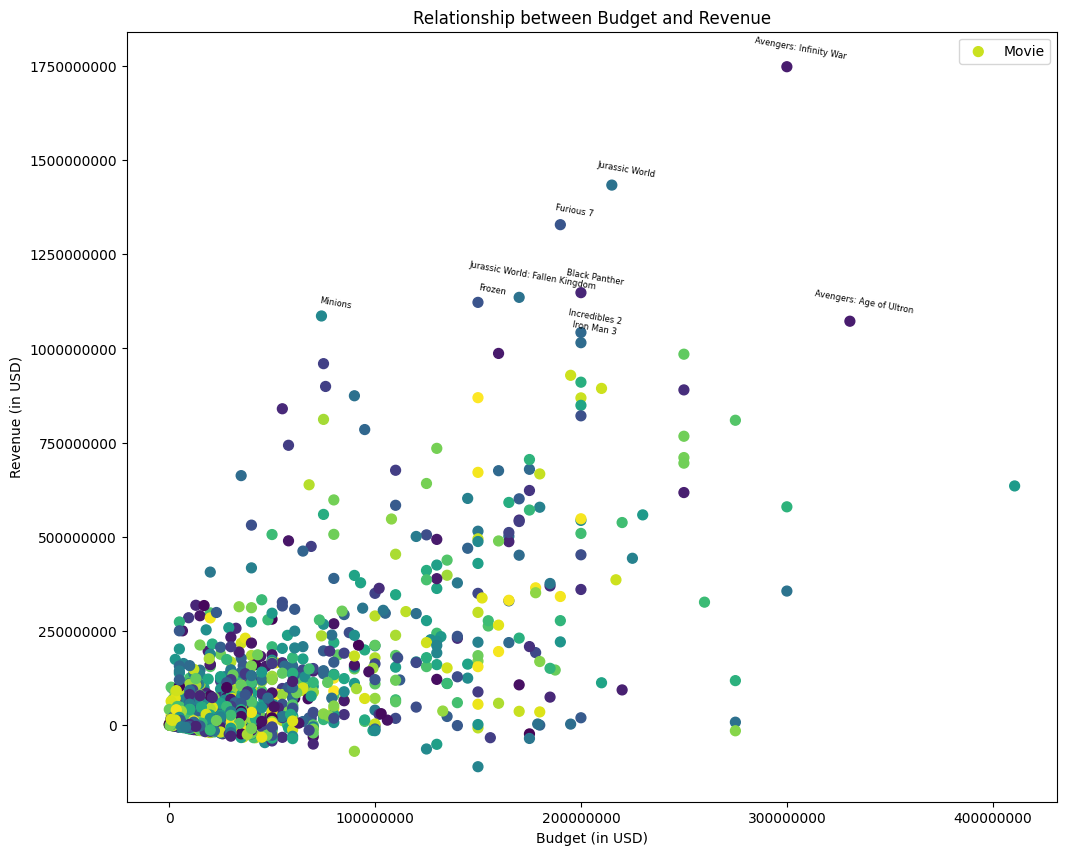

In [18]:
#Create scatterplot
plt.figure(figsize=(12, 10))
scatter = plt.scatter(revenue_final['budget'], revenue_final['revenue'], c=revenue_final['title'].astype('category').cat.codes, cmap='viridis', s=50, label='Movie')

#Customize the plot
plt.title('Relationship between Budget and Revenue')
plt.xlabel('Budget (in USD)')
plt.ylabel('Revenue (in USD)')
plt.legend()

#Positive correlation condition
positive_corr_points = revenue_final[revenue_final['budget'] < revenue_final['revenue']]

#Sort by profit in descending order to get the top positive correlation points
top_positive_corr_points = positive_corr_points.sort_values(by='revenue', ascending=False).head(10)

#Top 10 points with positive correlation
for index, row in top_positive_corr_points.iterrows():
    plt.annotate(row['title'], (row['budget'], row['revenue']), textcoords="offset points", xytext=(10, 6), ha='center', fontsize=6, rotation=-10)


#Show the plot
plt.ticklabel_format(style='plain', axis='both')
plt.grid(False)
plt.show()

### Average Revenue by Genre

Animation films have the highest average revenue, followed by Sci-Fi, Adventure and Action. Genre with the lowest average revenue is News.

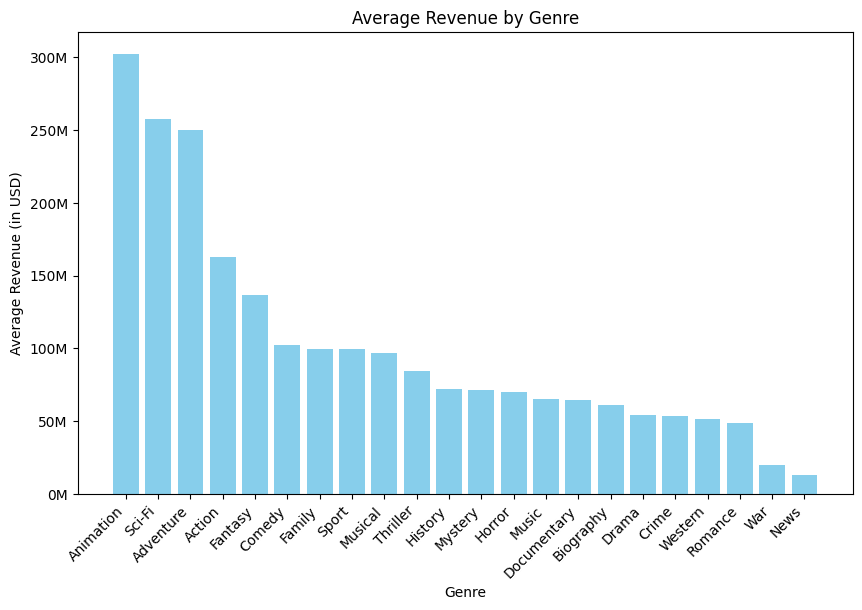

In [19]:
from matplotlib.ticker import FuncFormatter

#Formatting y-axis labels
#Source: Adapted from common practice for formatting axis labels in millions in data visualization
def millions_formatter(x, pos):
    return f'{x/1e6:.0f}M'

plt.figure(figsize=(10, 6))
plt.bar(avg_revenue_by_genre['genres'], avg_revenue_by_genre['revenue_per_genre'], color='skyblue')

#Formatting y-axis labels using millions_formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

#Show the plot
plt.title('Average Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue (in USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

## Evaluation

Discovering the top five film genres, understanding what genre audiences prefer, and exploring how the length of a movie relates to its ratings provided a clear understanding of how the film industry works. Spending more money in film production may lead to significant financial gains, as indicated by the positive correlation between budget and revenue. 

In evaluating how well the model fits the data, the analysis effectively captures patterns and trends within the provided dataset. The regression analysis of average rating over runtime in different genres highlights a distinct correlation supporting the model's reliability. The applicability of these findings depends on the dataset's representation of the film industry. A more diverse and inclusive dataset enhances confidence in applying these results broadly.

## Conclusions

Based on the analysis, three key recommendations for Microsoft: 
* **Focusing on genre for film production.** Microsoft should produce film in genres that have consistently demonstrated higher average revenue, including Animation, Sci-Fi, Adventure, Fantasy and Comedy.

* **Optimizing Budget Allocation.** The analysis showed a positive correlation between budget and revenue.Microsoft can enhance its budget allocation by strategically investing more in genres with the potential for higher returns. This ensures that financial resources are directed toward areas that have proven to be profitable in the film industry.

* **Considering producing films with shorter runtime.** A positive correlation between higher ratings and shorter runtime was shown in the analysis. Microsoft could explore content creation with shorter durations. This is particularly relevant in genres where audience preferences align with shorter films. Creating content that resonates with viewer preferences could contribute to higher audience satisfaction and, consequently, better financial performance.

**Limitations:**
* **Data limitation.** The analysis relies heavily on the given datasets, and the datasets' ability to represent the entire film industry is essential. Future efforts might involve obtaining more varied and comprehensive datasets to strengthen the reliability of the recommendations and conclusions.

* **Market demographic and dynamics.** As with many industries, various external factors can influence film industry. Factors such as cultural trends, cultural context,  global events, and technological advancements can play a big role in the creation of success film. Due to time constrains, analysis was not performed.

* **Genre categorization.**  Film genres are not always rigidly defined, and the process of categorization can involve subjective judgments as it is a process done by contributions from different people with different discipline and/or expertise. The lack of strict universal criteria, and their fluid nature allows for the incorporation of multiple elements. Hence, giving rise to new sub-genres. 

**Future Steps:**
* **Enhance data sources and quality.**  To resolve discrepencies in values from various sources, Microsoft should set up clear data protocols to ensure reliability and quality of the data.

* **Predictive analytics for genre trends.** Implement machine learning models that analyze historical data and industry trends to predict upcoming popular genres.

* **Collaboration with the film industry experts.** More holistic approach needed to better understand the global trend of film industry. Collaboration with the film industry experts can capture a much more broad perspective.
